# Model building

In [1]:
#Modeling Building

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
df=pd.read_csv("/Users/arjunrumba/Documents/ds_project/house_prices_advanced_regression_techniques/houseprice_eda.csv")
pd.set_option("Display.max_columns", None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,12,2008,WD,Normal,250000


## The categorical variables are converted into dummy variables. A dummy variable is a numerical variable used in regression analysis to represent subgroups of the variable.

In [4]:
#get dummy variables

houseprice_dummies=pd.get_dummies(df[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']])
houseprice_dummies

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unknown,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Garag

## The data split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. The test data will be used to test model's prediction. 

In [89]:
#train test split

from sklearn.model_selection import train_test_split

X=houseprice_dummies.drop(['Id','SalePrice'],axis=1)
y=np.log1p(houseprice_dummies['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 438
number of training samples: 1022


## Three different models are in use. 
## They are Multiple Linear Regression, LASSO Regression and Random Forest.

In [90]:
#multiple linear regression
import statsmodels.api as sm

X_sm =sm.add_constant(X)
model=sm.OLS(y, X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     61.74
Date:                Mon, 13 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:55:39   Log-Likelihood:                 1430.6
No. Observations:                1460   AIC:                            -2191.
Df Residuals:                    1125   BIC:                            -420.4
Df Model:                         334                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.2383      0.581      2.133      0.033       0.099       2.377
MSSubClass                  -0.0002      0.000     -0.612      0.541      -0.001       0.001
LotFrontage                  0.0003      0.000      1.216      0.224      -0.000       0.001
LotArea                   2.896e-06   5.22e-07      5.545      0.000    1.87e-06    3.92e-06
OverallQual                  0.0416      0.005      8.446      0.000       0.032       0.051
OverallCond                  0.0381      0.004      9.026      0.000       0.030       0.046
YearBuilt                    0.0017      0.000      4.676      0.000       0.001       0.002
YearRemodAdd                 0.0008      0.000      2.779      0.006       0.000       0.001
MasVnrArea                1.067e-05   2.73e-05      0.390      0.696    -4.3e-05    6.43e-05
BsmtFinSF1                3.892e-06   3.77e-05      0.103      0.918   -7.01e-05    7.79e-05
BsmtUnfSF                -4.956e-05   3.84e-05     -1.292      0.197      -0.000    2.57e-05
TotalBsmtSF                  0.0001   4.31e-05      3.188      0.001    5.28e-05       0.000
1stFlrSF                  3.814e-05   9.18e-05      0.416      0.678      -0.000       0.000
2ndFlrSF                  3.117e-05   8.61e-05      0.362      0.717      -0.000       0.000
GrLivArea                    0.0002   8.96e-05      2.150      0.032    1.68e-05       0.000
BsmtFullBath                 0.0287      0.009      3.058      0.002       0.010       0.047
BsmtHalfBath                 0.0129      0.014      0.889      0.374      -0.016       0.041
FullBath                     0.0211      0.011      1.978      0.048       0.000       0.042
HalfBath                     0.0188      0.010      1.874      0.061      -0.001       0.038
BedroomAbvGr                 0.0073      0.007      1.115      0.265      -0.006       0.020
KitchenAbvGr                -0.0292      0.028     -1.061      0.289      -0.083       0.025
TotRmsAbvGrd                 0.0018      0.005      0.395      0.693      -0.007       0.011
Fireplaces                   0.0136      0.012      1.092      0.275      -0.011       0.038
GarageCars                   0.0163      0.011      1.494      0.135      -0.005       0.038
GarageArea                   0.0001   3.75e-05      3.514      0.000    5.82e-05       0.000
WoodDeckSF                   0.0001   2.76e-05      3.744      0.000    4.92e-05       0.000
OpenPorchSF               3.393e-05   5.44e-05      0.623      0.533   -7.28e-05       0.000
EnclosedPorch                0.0001   6.04e-05      2.258      0.024    1.78e-05       0.000
3SsnPorch                    0.0002      0.000      1.436      0.151   -5.58e-05       0.000
ScreenPorch                  0.0003   5.87e-05      4.338      0.000       0.000       0.000
PoolArea      

In [91]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Cross validation score compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.

In [92]:
score_lr=np.mean(cross_val_score(lr,X_train,y_train,scoring='neg_mean_absolute_error',cv=4))
print(f"Error_lr: {score_lr}")

Error_lr: -0.11392129660024353


### The model is used to predict test set data. 

In [93]:
pred_lr = lr.predict(X_test)
print(pred_lr)

[11.8706015  12.75497434 11.50509352 12.02606247 12.78254234 11.35448023
 12.43479999 11.87222631 11.30817251 11.84510145 11.72587748 11.7142154
 11.30581867 12.27530377 12.06400381 11.71819412 12.16164585 11.77072058
 11.52771038 12.2812544  11.88699855 12.33465082 12.02638167 11.84771527
 12.21261221 11.85027126 12.13873868 11.61847632 12.10942095 12.14862475
 12.0853877  12.53916006 12.21492124 11.65077311 12.46210933 11.85733551
 11.88543207 12.18453774 12.66292643 11.63658551 11.73339096 12.28150977
 11.59177689 12.85141141 11.73205555 11.78887322 11.58658469 11.84842854
 13.17954671 11.84863246 11.67319571 12.23746843 11.58029231 12.76084821
 12.0697326  12.37233766 12.18728989 11.86496654 11.77335357 11.40283536
 11.14548686 11.99906654 12.65434777 12.46291348 12.61478444 12.16031875
 11.71517878 12.68295284 11.86879797 12.06103538 11.70638182 11.7628876
 11.66188782 11.06842756 13.1012235  12.17645368 12.6377401  12.69369866
 11.94471787 11.63690517 11.66123318 10.78492868 11.5

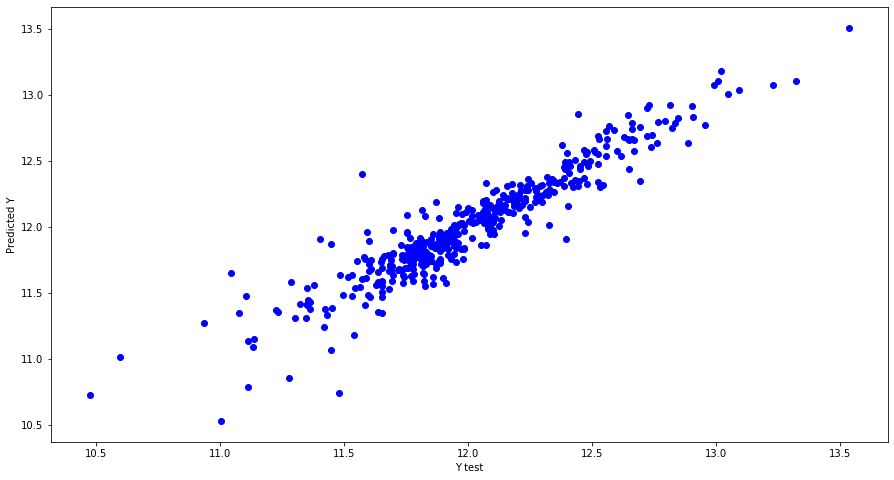

In [113]:
plt.figure(figsize=(15,8))
plt.scatter(y_test, pred_lr, c='blue')
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.show()

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
#LASSO regression

lsr=Lasso(alpha=0.0004)
lsr.fit(X_train, y_train)
score_lsr=np.mean(cross_val_score(lsr,X_train,y_train, scoring='neg_mean_absolute_error',cv=4))
print(f"Error_lasso: {score_lsr}")

Error_lasso: -0.08742045159746768


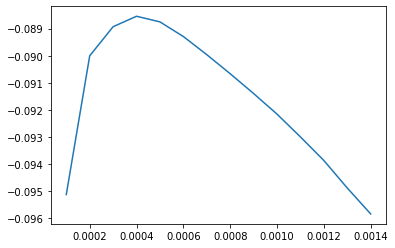

In [95]:
alpha=[]
error=[]

for i in range(1,15):
    alpha.append(i/10000)
    lsr=Lasso(alpha=(i/10000))
    error.append(np.mean(cross_val_score(lsr,X_train,y_train, scoring='neg_mean_absolute_error',cv=3)))

plt.plot(alpha,error)

In [96]:
err=tuple(zip(alpha,error))
df_err=pd.DataFrame(err, columns=['alpha','error'])
df_err[df_err.error==max(df_err.error)]

,alpha,error
3,0.0004,-0.088543


### The model is used to predict test set data. 

In [100]:
pred_lsr = lsr.predict(X_test)
print(f"\n {pred_lsr}")


 [11.92812109 12.72485468 11.54219225 11.97674817 12.72390518 11.29928603
 12.43757268 11.86209732 11.23967013 11.88089622 11.8562354  11.71642761
 11.44954124 12.24667385 12.06738637 11.8088801  12.18567119 11.79775712
 11.60311007 12.26580708 11.97983731 12.27300978 12.09022407 11.82558628
 12.20322945 11.93332651 12.16293994 11.57083386 12.08570476 12.18249061
 11.81265272 12.50547772 12.21405973 11.61789061 12.47135859 11.88726798
 11.85163743 12.22194386 12.69461692 11.57140373 11.82108593 12.3640091
 11.63631623 12.78010155 11.74945779 11.72669127 11.57923582 11.82373766
 13.04973331 11.76669046 11.68312655 12.21306303 11.61004357 12.58465363
 11.98286336 12.34608905 12.28714881 11.91156756 11.80778919 11.57597501
 11.29441069 12.04563298 12.64296897 12.45104608 12.61598239 12.22376593
 11.58524234 12.6762216  11.64194155 12.0190474  11.71842696 11.73820994
 11.62020157 11.30344018 13.09633697 12.13769452 12.59650268 12.68229322
 11.90885258 11.6583182  11.68827857 11.11011988 1

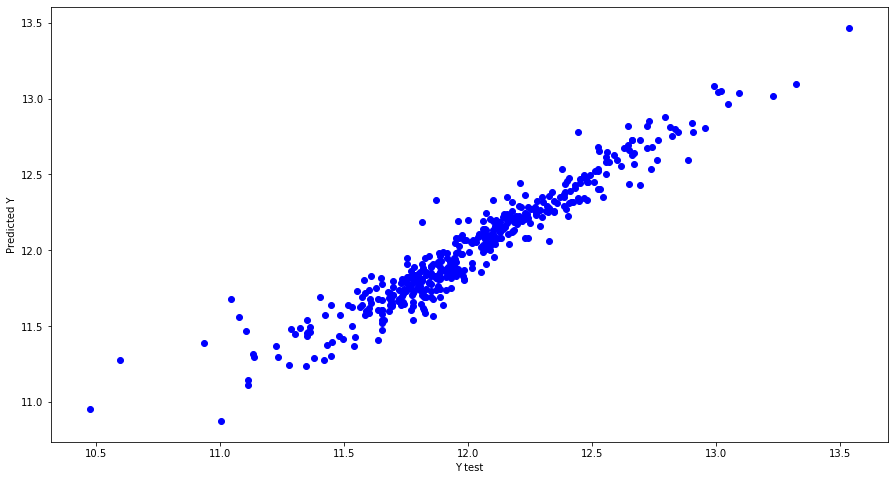

In [115]:
plt.figure(figsize=(15,8))
plt.scatter(y_test, pred_lsr, c='blue')
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.show()

In [101]:
#random forest
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train, y_train)

score_rf=(np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error',cv=3)))
print(f"Error_RF: {score_rf}")

Error_RF: -0.1109819157689823


### The model is used to predict test set data. 

In [102]:
pred_rf = rf.predict(X_test)
print(f"\n {pred_rf}")


 [11.86702754 12.67278792 11.67815404 11.96055743 12.63208684 11.33215763
 12.2198048  11.90103245 11.35267125 11.81800751 12.00095439 11.71506157
 11.54994728 12.22130075 12.11936677 11.81732213 12.11697577 11.80163557
 11.66883366 12.26852025 11.96631624 12.26960525 12.06045487 11.73355201
 12.18544438 11.99433245 12.15145835 11.53788777 12.10253724 12.18080463
 11.59228982 12.45273111 11.97227964 11.64183488 12.44725126 11.96404753
 12.00149486 12.2023179  12.63651324 11.62259203 11.68230061 12.37122043
 11.67620434 12.64002106 11.81333685 11.82557586 11.70335386 11.81600465
 12.74321546 11.74844897 11.71907974 12.17603593 11.71149626 12.76415332
 11.83277347 12.34295633 12.19044576 11.86397301 11.87467633 11.67132999
 11.19573449 11.97567979 12.63788484 12.44404715 12.63591831 12.12871309
 11.61461854 12.53169929 11.65199043 12.0156172  11.71280189 11.79009718
 11.68621629 11.42113119 12.99145416 12.04115453 12.64614416 12.59440673
 11.8328101  11.75155474 11.41899386 11.54458522 

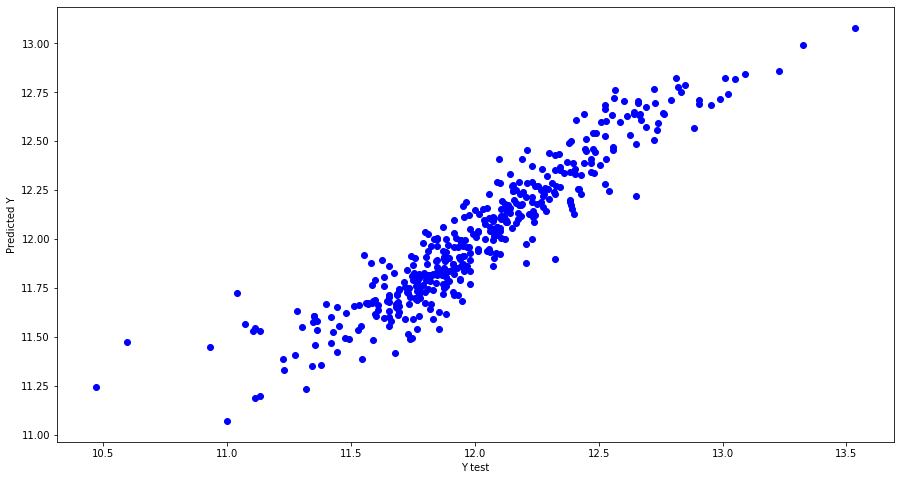

In [116]:
plt.figure(figsize=(15,8))
plt.scatter(y_test, pred_rf, c='blue')
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.show()

### Mean absolute error is one of the evaluation metrics in regression models. In the context of regression, the error of the model is the difference between the data points and the trend line generated by the algorithm. Mean absolute error is the mean of the absolute value of the errors. This is the easiest of the metrics to understand, since it's just the average error.

### Based on mean absolute error, the predicted values are evaluated. 

In [117]:
from sklearn.metrics import mean_absolute_error

p_lr=mean_absolute_error(y_test,pred_lr)
print(f" Multiple Linear Regression (MAE) : {p_lr}")
p_lsr=mean_absolute_error(y_test,pred_lsr)
print(f" LASSO Regression (MAE) : {p_lsr}")
p_rf=mean_absolute_error(y_test,pred_rf)
print(f" Random Forest (MAE) : {p_rf}")

 Multiple Linear Regression (MAE) : 0.09938720120653549
 LASSO Regression (MAE) : 0.08296194993733137
 Random Forest (MAE) : 0.10594839677613957


### The LASSO model performs better (MAE = 0.08) than other models on the test and validation sets.